# **Experiment 1: One vs All Classification**

## ***Objectives for this Notebook***
In the one-versus-all study, a total of 5 independent analyses were conducted. For each analysis, a different cancer class was targeted (positive class) and the samples from the remaining classes were grouped together into one major class (negative class), resulting in a binary classification problem. Results are summarized in Table 1 and can be analyzed in greater detail from Supplementary Tables S3 to S7. From the balanced accuracy of the RF models in the test split, the five cancers form two groups with distinct performances. HNSC, STAD, and COAD achieved balanced accuracy values ranging from 87% to 96% while for ESCA and READ, results show an increase in classification difficulty, with performances for both cases below Figure 2. Experiment pipeline for the learning models development, with the isolated implementation of the RF algorithm (Experiment 1), the implementation of dimensionality reduction (DR) and feature engineering (FE) alongside the tuned RF (Experiments 2 and 3, respectively), and the final application of oversampling (O) with the previous techniques (Experiments 4 and 5). Red squares indicate that hyper-parameter tuning is being performed to a specific technique while red arrows indicate the use of a technique tuned in a former experiment

**One vs All Classifivcation (OvA)**, also known as One-vs-Rest (OvR), is a strategy used in machine learning for multiclass classification problems. In a multiclass classification task, there are more than two possible classes or categories that a given input can belong to. The goal of OvA is to extend binary classification algorithms to handle multiclass scenarios.

Here's a brief explanation of the One-vs-All strategy:

1. **Binary Classification for Each Class**: For each unique class in the multiclass problem, a binary classifier is trained. This means that if there are k classes, you will train k binary classifiers.

2. **Training Process**: For a specific class, the samples belonging to that class are considered as the positive class, and all other samples from other classes are considered as the negative class.
The binary classifier is trained to distinguish between the samples of the current class and the samples from all other classes.

3. **Decision Making**: During the prediction phase, each binary classifier makes a prediction, and the class associated with the classifier that outputs the highest confidence is chosen as the final prediction.

This way, the problem of multiclass classification is transformed into multiple binary classification subproblems. The following is our setup for this experiment:
* **HNSC vs All**
* **STAD vs All**
* **COAD vs All**
* **ESCA vs All**
* **READ vs All**

## **1.) Loading the dataset and setting parameters**

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, balanced_accuracy_score

import random
from sklearn.utils import check_random_state

seed_value = 42
# Set Python seed
random.seed(seed_value)

# Set NumPy seed
np.random.seed(seed_value)

# Set scikit-learn seed
sklearn_random_state = check_random_state(seed_value)

In [2]:
microbiome_df = pd.read_csv("./dataset/microbiome_preprocessed_files/microbiome_merged_dfs.csv")
microbiome_df

,name,Simonsiella,Treponema,Campylobacter,Helicobacter,Paracoccus,Comamonas,Pseudomonas,Xanthomonas,Agrobacterium,...,Hungatella,Pseudopropionibacterium,Peptoanaerobacter,Emergencia,Prevotellamassilia,Criibacterium,Fournierella,Negativibacillus,Duodenibacillus,label
0,TCGA-CG-5720-01A,0.0,0.000000,0.000000,0.895050,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,STAD
1,TCGA-CN-4741-01A,0.0,0.000000,0.010470,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,HNSC
2,TCGA-BR-6801-01A,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,STAD
3,TCGA-IG-A3I8-01A,0.0,0.000000,0.000000,0.067717,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,ESCA
4,TCGA-L5-A4OT-01A,0.0,0.000000,0.012202,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,ESCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,TCGA-CG-5719-01A,0.0,0.000000,0.000000,0.106557,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,STAD
508,TCGA-CQ-5329-01A,0.0,0.175564,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.136613,0.0,0.0,0.0,0.0,0.0,0.0,HNSC
509,TCGA-CQ-7068-01A,0.0,0.335060,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.011534,0.0,0.0,0.0,0.0,0.0,0.0,HNSC
510,TCGA-CG-4455-01A,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.014781,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,STAD


## **2.) Creating a data loader**

In machine learning, the data loader fuels the machine learning models. Think of the data loader as the chef of the AI kitchen! We will create our own data loader that will fetch the relevant data from our dataframe. 

For experiment 1 using OvA, since we 5 classes, we will have 5 binary classifiers. Because we have 5 binary classifiers, we will need also need 5 datasets. For each dataset, we have a different cancer class that is targeted (positive class) and the samples from the remaining classes were grouped together into one major class (negative class), to make a binary classification problem.

The dataloader takes in the data we processed from the first notebook, and outputs a dictionary of datasets for experiment 1.


In [3]:
classes = ["HNSC", "STAD", "COAD", "ESCA", "READ"]

In [4]:
# Show the counts for each class in the df
microbiome_df["label"].value_counts()

label
HNSC    155
STAD    127
COAD    125
ESCA     60
READ     45
Name: count, dtype: int64

In [5]:
def exp_1_data_loader(dataframe, label_column, classes, train_test=True):
    """
    Generate a one-vs-all dataset for a specific class for experiment 1

    Parameters:
    - dataframe: pd.DataFrame, the input DataFrame.
    - label_column: str, the column name representing the labels.
    - classes: list, the classes.

    Returns:
    - dataset_dict: a dictionary where the keys is the targeted class and the values are its corresponding features and labels
    """

    dataset_dict = {}

    for i in classes:
        positive_class = i
        dframe = dataframe.copy()
        dframe['label'] = [1 if x == positive_class else 0 for x in dataframe[label_column]]
        print(dframe.label.value_counts())
        X = dframe.drop(["name", "label"], axis=1)
        y = dframe["label"]
        if train_test:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=seed_value)
            dataset_dict[positive_class] = {"train": (X_train, y_train),
                                            "test": (X_test, y_test)}
        else:
            dataset_dict[positive_class] = {"feature": X, 
                                            "label": y}

    return dataset_dict

In [6]:
exp1_datasets = exp_1_data_loader(microbiome_df, "label", classes, train_test=True)

label
0    357
1    155
Name: count, dtype: int64
label
0    385
1    127
Name: count, dtype: int64
label
0    387
1    125
Name: count, dtype: int64
label
0    452
1     60
Name: count, dtype: int64
label
0    467
1     45
Name: count, dtype: int64


Let's go over how the data is structured in our dictionary.
```
exp_1_dataset: {
    targeted_class_1: {
        train_1: [features_1, target_1],
        test_1: [features_1, target_1]
    },
    targeted_class_2: {
        train_2: [features_2, target_2],
        test_2: [features_2, target_2]
    },...,
    targeted_class_n: {
        train_n: [features_n, target_n],
        test_n: [features_n, target_n]
    }
}
```

So, for example to access the class "HNSC" train features and targets, we can run:
```
features = exp1_datasets["HNSC"]["train"][0]
target = exp1_datasets["HNSC"]["train"][1]
```

Finally, we are done working with the data. The next section will go over model creation for the HSNC class using cross-validation and hyperparameter grid search. 

## **3.) Cross Validation and Hyperparameter Grid Search**

When performing the usual train/validation/test split for model training and testing, the model undergoes training on a specific randomly selected subset of the data, validation on another distinct set of data, and finally is tested on a separate holdout dataset. However, this approach can pose challenges, particularly with relatively small datasets, as it may exclude crucial observations essential for training an optimal model. Reserving a percentage of data outside the training phase, even if it's in the range of 15–25%, retains valuable information that can significantly enhance the effectiveness of our model training.

The solution is cross validation. 

**Cross validation**: Entails dividing the dataset into random groups, reserving one group as the test set, and training the model on the remaining groups. This process is iterated for each group designated as the test set, and the resulting models are averaged to create the final model.

Here's a simple diagram of how it works:
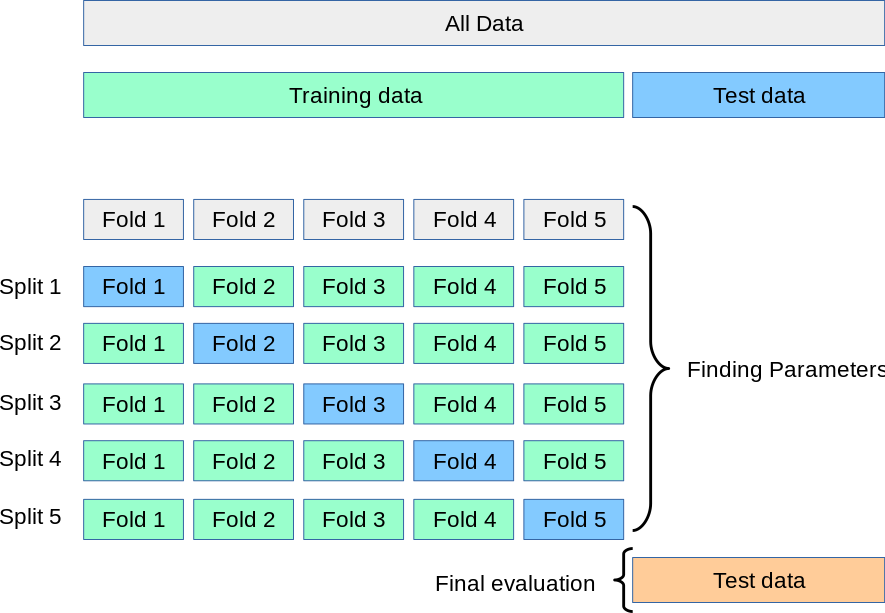

Read more how it works here: https://www.geeksforgeeks.org/cross-validation-machine-learning/

While cross validation can definitely benefit model development, one important drawback is that it is computationally expensive as the dataset gets larget and as the value of k increases. For the remainder of this section, we will look on how to implement cross validation on random forest. Additionally, we will run the model over a grid of hyperparmeters in order to identify optimal result.

**Hyperparameter Grid Search**: Systematically explores different hyperparameter combinations to find the best configuration for a model.


### **a) Training**

We will use HNSC vs All as an example first. For our classifier we will use Random Forest. For our cross validation object, we will use the library `StratifiedKFold` and set split to 5, shuffle to True, and declare the random state equal to our seed value. Read more about `StratifiedKFold` here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html



In [7]:
features = exp1_datasets["HNSC"]["train"][0]
target = exp1_datasets["HNSC"]["train"][1]

rf = RandomForestClassifier(random_state=seed_value)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed_value)

Now let's create a grid of parameters values for our random forest classification model. The first parameter is n_estimators, which is the number of trees used in our random forest model. Read the rest of the definitions of the hyperparameters in sklearn's website: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [8]:
# These value ranges come from the paper.
param_grid = {
            'n_estimators': [1, 50, 100, 150, 200, 250, 300, 350, 400],
            'criterion' : ["gini", "entropy"],
            'max_depth': [1,10,20,30,40,50],
            'min_samples_split': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
            'min_samples_leaf': [1, 10, 20]
        }

**GridSearchCV:** 
The module we will be utilizing is sklearn’s GridSearchCV, which will allow us to pass our specific estimator, our grid of parameters, our preferred scoring metric, and our cross validation object. The documentation for this method can be found here. The main parameters are highlighted below:

* **estimator**: this parameter allows you to select the specific model you’re choosing to run, in our case Random Forest Classification.
* **param_grid**: this parameter allows you to pass the grid of parameters you are searching. This grid must be formatted as a dictionary with the key corresponding to the specific estimator’s parameter names, and the values corresponding to a list of values to pass for the specific parameters.
* **scoring**: Strategy to evaluate the performance of the cross-validated model on the test set. For scoring, we will use `balanced_accuracy` as it is used in the paper. You can use other metrics as you wish.
* **n_jobs**: Number of jobs to run in parallel. `None` means 1 and `-1` means use all processors.
* **cv**: this parameter allows you to change the number of folds for the cross validation or a cross validation object.

In [20]:
# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring=make_scorer(balanced_accuracy_score),  # Choose an appropriate metric for your problem
    cv=cv,
    n_jobs=-1,  # Use all available processors,
    return_train_score=True
)

In [21]:
# Perform the grid search
## Note: This code will run a while depending on big your parameter grid search is.
grid_search.fit(features, target)

/Users/gbaldonado/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1620 fits failed out of a total of 17820.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1620 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/gbaldonado/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/gbaldonado/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/gbaldonado/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/base.py", line 6

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 10, 20],
                         'min_samples_split': [1, 10, 20, 30, 40, 50, 60, 70,
                                               80, 90, 100],
                         'n_estimators': [1, 50, 100, 150, 200, 250, 300, 350,
                                          400]},
             return_train_score=True,
             scoring=make_scorer(balanced_accuracy_score))

In [22]:
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 40, 'n_estimators': 50}


In [23]:
# Get the best model
best_model = grid_search.best_estimator_

### **b.) Evaluation**

In [24]:
# Access cv_results_ attribute to get detailed results
cv_results = grid_search.cv_results_

In [25]:
# Get the test features and targets
test_features = exp1_datasets["HNSC"]["test"][0]
test_target = exp1_datasets["HNSC"]["test"][1]

# # Get predictions
predictions = best_model.predict(test_features)
balanced_accuracy = balanced_accuracy_score(test_target, predictions)
print("Balanced Accuracy on Test Set:", balanced_accuracy)


# Calculate mean train score and mean test score
mean_train_score = cv_results['mean_train_score'][grid_search.best_index_]
mean_test_score = cv_results['mean_test_score'][grid_search.best_index_]

print("Mean Train Score:", mean_train_score)
print("Mean Test Score:", mean_test_score)

report = {}
report["HNSC"] = {
    "model": best_model,
    "best_hyperparameters": grid_search.best_params_,
    "accuracy_on_test": balanced_accuracy,
    "mean_train_score": mean_train_score,
    "mean_test_score": mean_test_score
        }

Balanced Accuracy on Test Set: 0.7858293075684379
Mean Train Score: 0.9115988081968643
Mean Test Score: 0.8311825697071598


Great job! We have trained and evaluated a model for HNSC using cross validation and grid search cross validation. Now, we ned to perform the same steps for the rest of the classes.

## **4.) Creating a Training Loop Function**

Now we've gone over how grid search cross validation, let's create a function that will work on all of our 5 OvA clases at once.

The input of this function are the folloinwg:
* **dataset_dict**: The dictionary of our datasets
* **classess**: A list of our classes
* **cv_n_split**: An integer that determines how many splits to use in cross validation. Default `5`.
* **n_jobs**: An integer that determines how many processes to use. Default `-1`, all processors.

The output is the following:
* **report**: A dictionary that includes the best model object, the best hyperparemeters, and the accuracy on the test set for each targeted label.

In [26]:
def perform_gridsearchcv(dataset_dict, classes, cv_n_splits=5, n_jobs=12):
    report = {}
    for c in classes:
        print("Class: ", c)
        features = dataset_dict[c]["train"][0]
        target = dataset_dict[c]["train"][1]

        # Define the classifier
        rf = RandomForestClassifier(random_state=seed_value)

        # Define the hyperparameters and their potential values for the grid search
        param_grid = {
            'n_estimators': [1, 50, 100, 150, 200, 250, 300, 350, 400],
            'criterion' : ["gini", "entropy"],
            'max_depth': [1,10,20,30,40,50],
            'min_samples_split': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
            'min_samples_leaf': [1, 10, 20]
        }

        cv = StratifiedKFold(n_splits=cv_n_splits, shuffle=True, random_state=seed_value)

        # Create the GridSearchCV object
        grid_search = GridSearchCV(
            estimator=rf,
            param_grid=param_grid,
            scoring=make_scorer(balanced_accuracy_score),  # Choose an appropriate metric for your problem
            cv=cv,
            n_jobs=-1,  # Use all available processors,
            return_train_score=True
)

        # Perform the grid search
        grid_search.fit(features, target)

        # Access cv_results_ attribute to get detailed results
        cv_results = grid_search.cv_results_

        # Print the best hyperparameters
        print("Best Hyperparameters:", grid_search.best_params_)

        # Get the best model
        best_model = grid_search.best_estimator_

        # Evaluate the best model on your test set
        # Assuming you have X_test and y_test from your data
        # Modify this based on your actual test set
        predictions = best_model.predict(dataset_dict[c]["test"][0])
        accuracy = balanced_accuracy_score(dataset_dict[c]["test"][1], predictions)
        print("Accuracy on Test Set:", accuracy)


        # Calculate mean train score and mean test score
        mean_train_score = cv_results['mean_train_score'][grid_search.best_index_]
        mean_test_score = cv_results['mean_test_score'][grid_search.best_index_]

        print("Mean Train Score:", mean_train_score)
        print("Mean Test Score:", mean_test_score)


        report[c] = {
            "model": best_model,
            "best_hyperparameters": grid_search.best_params_,
            "test_score": accuracy,
            "mean_train_score": mean_train_score,
            "mean_validation_score": mean_test_score
        }
        
    return report


In [27]:
exp1_report = perform_gridsearchcv(exp1_datasets, classes)
exp1_report

Class:  HNSC


/Users/gbaldonado/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1620 fits failed out of a total of 17820.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1620 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/gbaldonado/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/gbaldonado/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/gbaldonado/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/base.py", line 6

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 40, 'n_estimators': 50}
Accuracy on Test Set: 0.7858293075684379
Mean Train Score: 0.9115988081968643
Mean Test Score: 0.8311825697071598
Class:  STAD


/Users/gbaldonado/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1620 fits failed out of a total of 17820.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1620 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/gbaldonado/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/gbaldonado/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/gbaldonado/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/base.py", line 6

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy on Test Set: 0.780852994555354
Mean Train Score: 0.9815244117689069
Mean Test Score: 0.7930802530802531
Class:  COAD


/Users/gbaldonado/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1620 fits failed out of a total of 17820.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1620 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/gbaldonado/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/gbaldonado/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/gbaldonado/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/base.py", line 6

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy on Test Set: 0.8956442831215972
Mean Train Score: 0.9650395841018744
Mean Test Score: 0.8927405927405927
Class:  ESCA


/Users/gbaldonado/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1620 fits failed out of a total of 17820.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1620 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/gbaldonado/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/gbaldonado/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/gbaldonado/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/base.py", line 6

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 1}
Accuracy on Test Set: 0.5964052287581699
Mean Train Score: 0.7347151023680379
Mean Test Score: 0.6691695146958304
Class:  READ
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 1}
Accuracy on Test Set: 0.7
Mean Train Score: 0.6765047203411471
Mean Test Score: 0.6096790235081375


/Users/gbaldonado/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1620 fits failed out of a total of 17820.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1620 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/gbaldonado/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/gbaldonado/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/gbaldonado/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/base.py", line 6

{'HNSC': {'model': RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=40,
                         n_estimators=50, random_state=42),
  'best_hyperparameters': {'criterion': 'entropy',
   'max_depth': 20,
   'min_samples_leaf': 1,
   'min_samples_split': 40,
   'n_estimators': 50},
  'test_score': 0.7858293075684379,
  'mean_train_score': 0.9115988081968643,
  'mean_validation_score': 0.8311825697071598},
 'STAD': {'model': RandomForestClassifier(criterion='entropy', max_depth=30, min_samples_split=10,
                         random_state=42),
  'best_hyperparameters': {'criterion': 'entropy',
   'max_depth': 30,
   'min_samples_leaf': 1,
   'min_samples_split': 10,
   'n_estimators': 100},
  'test_score': 0.780852994555354,
  'mean_train_score': 0.9815244117689069,
  'mean_validation_score': 0.7930802530802531},
 'COAD': {'model': RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=200,
                         random_state=42),
  'best_hy

It's good practice to export the findings of the experiment so that you can go back later and perform any analysis.

In [34]:
def best_hyperparameter_to_df(nested_dict, exp_name):
    path = "./dataset/microbiome_preprocessed_files/"
    data = []

    for key, value in nested_dict.items():
        entry = {'label': key}
        entry.update(value['best_hyperparameters'])
        entry['test_score'] = value['test_score']
        entry['mean_train_score'] = value['mean_train_score']
        entry['mean_validation_score'] = value['mean_validation_score']
        data.append(entry)

    df = pd.DataFrame(data)

    df.to_csv(path+f"{exp_name}_best_hyperparam.csv", index=False)
    return df

In [35]:
best_hyperparameter_to_df(exp1_report, "exp1")

,label,criterion,max_depth,min_samples_leaf,min_samples_split,n_estimators,test_score,mean_train_score,mean_validation_score
0,HNSC,entropy,20,1,40,50,0.785829,0.911599,0.831183
1,STAD,entropy,30,1,10,100,0.780853,0.981524,0.793080
2,COAD,gini,20,1,10,200,0.895644,0.965040,0.892741
3,ESCA,gini,10,1,10,1,0.596405,0.734715,0.669170
4,READ,entropy,10,1,20,1,0.700000,0.676505,0.609679


In [47]:
## Export the results
import json

path = "./dataset/microbiome_preprocessed_files/results"
if os.path.exists(path):
    print("Path exists")
else:
    os.mkdir("./dataset/microbiome_preprocessed_files/results")


Path exists


In [48]:
exp1_report

{'HNSC': {'model': RandomForestClassifier(criterion='entropy', max_depth=40, min_samples_split=30,
                         n_estimators=250),
  'best_hyperparameters': {'criterion': 'entropy',
   'max_depth': 40,
   'min_samples_leaf': 1,
   'min_samples_split': 30,
   'n_estimators': 250},
  'accuracy_on_test': 0.7983091787439613},
 'STAD': {'model': RandomForestClassifier(criterion='entropy', max_depth=40, min_samples_split=20,
                         n_estimators=50),
  'best_hyperparameters': {'criterion': 'entropy',
   'max_depth': 40,
   'min_samples_leaf': 1,
   'min_samples_split': 20,
   'n_estimators': 50},
  'accuracy_on_test': 0.780852994555354},
 'COAD': {'model': RandomForestClassifier(max_depth=40, min_samples_split=10, n_estimators=50),
  'best_hyperparameters': {'criterion': 'gini',
   'max_depth': 40,
   'min_samples_leaf': 1,
   'min_samples_split': 10,
   'n_estimators': 50},
  'accuracy_on_test': 0.8784029038112522},
 'ESCA': {'model': RandomForestClassifier(max_

In [46]:

path = "./dataset/microbiome_preprocessed_files/results/"
with open(path + "exp1_report.txt", "w") as file:
    json.dump(str(exp1_report), file, indent=4)


Thanks for making it this far! We have accomplished experiment 1, which will serve as our baseline for our other experiments. In experiment 2, we will explore how we can make the best out of our relatively small dataset through a technique called feature engineering.